In [2]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [3]:
import json
import pandas
from collections import Counter

In [4]:
json_data = open("corepoweryoga/corepoweryoga.json")
j = json.load(json_data)
json_data.close()

In [5]:
totalTags = []
for i in range(len(j)):
    if 'tags' in j[i].keys():
        try:
            totalTags+=[str(b) for b in j[i]['tags']]
        except:
            pass

In [6]:
wordCount = Counter(totalTags)

In [10]:
df = pandas.DataFrame.from_dict(wordCount, orient='index')
df1 = df[df>10]
df2= df1.dropna()
df3 = df2.head(20)
df4 = df3.drop(['corepoweryoga'])
df4.sort_values([0], ascending=False)

,0
yoga,397.0
yogaeverydamnday,226.0
yogi,140.0
yogalove,139.0
yogalife,116.0
cpy,76.0
yogini,61.0
instayoga,58.0
yogachallenge,58.0
igyoga,54.0


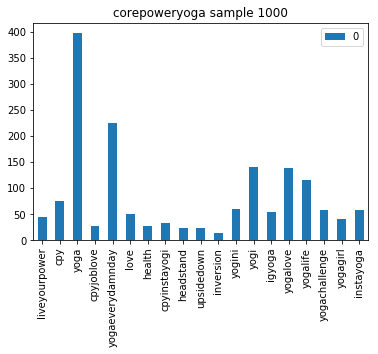

In [12]:
df4.plot(kind='bar', title = "corepoweryoga sample 1000")

In [54]:
df5 = df2.head(100).drop(['corepoweryoga'])
listofhash = list(df5.index)
print (listofhash)
yogacount = 0
fitcount =0
for b in listofhash:
    print (b)
    if 'yoga' in b and 'yoga' != b:
        print ("HAS yoga", b)
        yogacount+=1
        listofhash.remove(b)
        if b in listofhash: print ("AH")
    elif 'fit' in b and 'fitness' != b:
        fitcount +=1
        listofhash.remove(b)
print (yogacount)
print (fitcount)

['liveyourpower', 'cpy', 'yoga', 'cpyjoblove', 'yogaeverydamnday', 'love', 'health', 'cpyinstayogi', 'headstand', 'upsidedown', 'inversion', 'yogini', 'yogi', 'igyoga', 'yogalove', 'yogalife', 'yogachallenge', 'yogagirl', 'instayoga', 'handstand', 'yogainspiration', 'corepower', 'summerwarrior', 'fitness', 'fitnessmotivation', 'coreworkout', 'yogisofinstagram', 'breathe', 'namaste', 'MasteringHandstands', 'practiceandalliscoming', 'yogafit', 'yogajourney', 'ashtangayoga', 'yogaflow', 'yogamagic', 'yogastrong', 'yogafun', 'yogaeveryday', 'yogapractice', 'instayogi', 'igyogafamily', 'newengland', 'bostonyoga', 'vinyasa', 'asana', 'cpyboston', 'getsweaty', 'eastcoast', 'hotyoga', 'poweryoga', 'core', 'abs', 'instagood', 'picoftheday', 'sculpt', 'yogasculpt', 'yogateacher', 'strength', 'flow', 'handstands', 'lululemon', 'whyiyoga', 'atxyoga', 'yogagram', 'yogaeverywhere', 'myyogalife', 'yogatime', 'armbalance', 'strengthtraining', 'myhappyplace', 'practice', 'yogamen', 'yogadudes', 'fitfam

In [48]:
print (listofhash)

['liveyourpower', 'cpy', 'yoga', 'cpyjoblove', 'love', 'health', 'cpyinstayogi', 'headstand', 'upsidedown', 'inversion', 'yogini', 'yogi', 'yogalove', 'yogachallenge', 'instayoga', 'handstand', 'corepower', 'summerwarrior', 'fitness', 'coreworkout', 'yogisofinstagram', 'breathe', 'namaste', 'MasteringHandstands', 'practiceandalliscoming', 'yogajourney', 'yogaflow', 'yogastrong', 'yogaeveryday', 'instayogi', 'newengland', 'vinyasa', 'asana', 'cpyboston', 'getsweaty', 'eastcoast', 'poweryoga', 'core', 'abs', 'instagood', 'picoftheday', 'sculpt', 'yogateacher', 'strength', 'flow', 'handstands', 'lululemon', 'atxyoga', 'yogaeverywhere', 'yogatime', 'armbalance', 'strengthtraining', 'myhappyplace', 'practice', 'yogadudes', 'functionality', 'onthematt', 'menwithhealth', 'workout', 'guysdoyoga', 'happy', 'loveyourself', 'absworkout', 'motivation', 'pilatesbrasil', 'pilateslovers', 'pilates', 'pilatesparatodos', 'contrologia', 'josephpilates', 'flexibilidade', 'equilibrio', 'coordenaçâo', 'alo

In [45]:
yogasum=0
fitsum=0
for b in listofhash:
    if 'yoga' in b:
        print (b)
        yogasum+=df5.loc[b][0]
        if 'yoga' != b:
            df5 = df5.drop([b])
    elif 'fit' in b:
        fitsum+=df5.loc[b][0]
        if 'fitness' != b:
            df5 = df5.drop([b])

yoga
yogalove
yogachallenge
instayoga
yogajourney
yogaflow
yogastrong
yogaeveryday
poweryoga
yogateacher
atxyoga
yogaeverywhere
yogatime
yogadudes
guysdoyoga


In [38]:
df5[0]['yoga']=yogasum
df5[0]['fit']=fitsum

In [39]:
print (yogacount)
print (fitcount)
print (df5)

21
2
                             0
liveyourpower             45.0
cpy                       76.0
yoga                    1037.0
cpyjoblove                27.0
yogaeverydamnday         226.0
love                      51.0
health                    27.0
cpyinstayogi              34.0
headstand                 23.0
upsidedown                24.0
inversion                 14.0
yogini                    61.0
yogi                     140.0
igyoga                    54.0
yogalife                 116.0
yogagirl                  41.0
handstand                 28.0
yogainspiration          110.0
corepower                 63.0
summerwarrior             14.0
fitness                  114.0
fitnessmotivation         22.0
coreworkout               72.0
yogisofinstagram          69.0
breathe                   21.0
namaste                  130.0
MasteringHandstands       12.0
practiceandalliscoming    15.0
yogafit                   30.0
ashtangayoga              13.0
...                        ...
myy

In [ ]:
#############

In [23]:
json_data = open("flywheel/flywheel.json")
j = json.load(json_data)
json_data.close()

In [24]:
totalTags = []
for i in range(len(j)):
    if 'tags' in j[i].keys():
        try:
            totalTags+=[str(b) for b in j[i]['tags']]
        except:
            pass

In [25]:
wordCount = Counter(totalTags)

In [26]:
df = pandas.DataFrame.from_dict(wordCount, orient='index')
df1 = df[df>10]
df2= df1.dropna()
df3 = df2.head(20)
df3.sort_values([0], ascending=False)

,0
flywheel,694.0
fitness,156.0
nevercoast,140.0
flywheelsports,134.0
flyfam,82.0
cycling,64.0
clutch,62.0
poweryourlife,43.0
fit,39.0
sweat,39.0


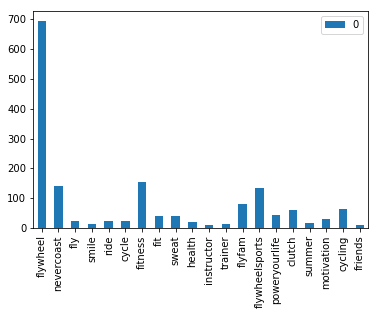

In [27]:
df3.plot(kind='bar')

In [28]:
json_data = open("barmethod/barmethod.json")
j = json.load(json_data)
json_data.close()

In [29]:
totalTags = []
for i in range(len(j)):
    if 'tags' in j[i].keys():
        try:
            totalTags+=[str(b) for b in j[i]['tags']]
        except:
            pass

In [30]:
wordCount = Counter(totalTags)

In [31]:
df = pandas.DataFrame.from_dict(wordCount, orient='index')
df1 = df[df>10]
df2= df1.dropna()
df3 = df2.head(20)
df3.sort_values([0], ascending=False)

,0
barmethod,675.0
barre,279.0
fitness,160.0
fitfam,88.0
barrefitness,69.0
motivation,58.0
BarMethod,44.0
barbabes,27.0
barbabe,24.0
bestbarre,24.0


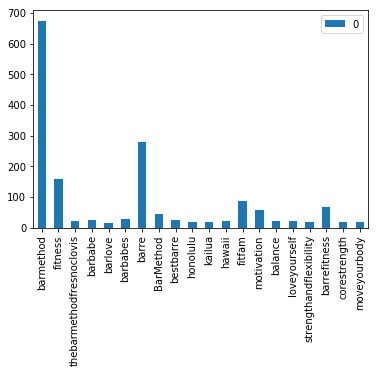

In [32]:
df3.plot(kind='bar')

In [33]:
json_data = open("mixxyoga/mixxyoga.json")
j = json.load(json_data)
json_data.close()

In [34]:
totalTags = []
for i in range(len(j)):
    if 'tags' in j[i].keys():
        try:
            totalTags+=[str(b) for b in j[i]['tags']]
        except:
            pass

In [35]:
wordCount = Counter(totalTags)

In [36]:
df = pandas.DataFrame.from_dict(wordCount, orient='index')
df1 = df[df>10]
df2= df1.dropna()
df3 = df2.head(20)
df3.sort_values([0], ascending=False)

,0
mixxyoga,405.0
yoga,325.0
newportbeach,211.0
yogaeverydamnday,205.0
namaste,203.0
orangecounty,152.0
oc,133.0
cardio,124.0
socal,112.0
stretch,109.0


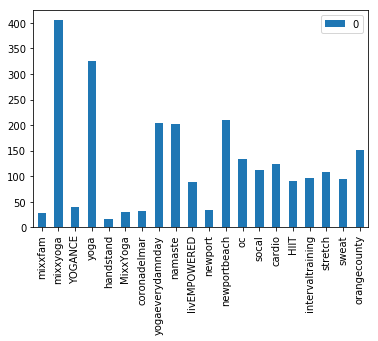

In [37]:
df3.plot(kind='bar')

In [39]:
json_data = open("powerlifting/powerlifting.json")
j = json.load(json_data)
json_data.close()

In [40]:
totalTags = []
for i in range(len(j)):
    if 'tags' in j[i].keys():
        try:
            totalTags+=[str(b) for b in j[i]['tags']]
        except:
            pass

In [41]:
wordCount = Counter(totalTags)

In [42]:
df = pandas.DataFrame.from_dict(wordCount, orient='index')
df1 = df[df>10]
df2= df1.dropna()
df3 = df2.head(20)
df3.sort_values([0], ascending=False)

,0
powerlifting,743.0
fitness,380.0
bodybuilding,347.0
gym,255.0
fit,148.0
strength,127.0
muscle,98.0
instafit,83.0
fitnessmotivation,80.0
power,56.0


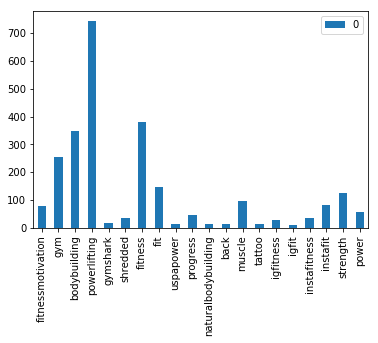

In [43]:
df3.plot(kind='bar')

In [44]:
json_data = open("barrysbootcamp/barrysbootcamp.json")
j = json.load(json_data)
json_data.close()

In [45]:
totalTags = []
for i in range(len(j)):
    if 'tags' in j[i].keys():
        try:
            totalTags+=[str(b) for b in j[i]['tags']]
        except:
            pass

In [46]:
wordCount = Counter(totalTags)

In [47]:
df = pandas.DataFrame.from_dict(wordCount, orient='index')
df1 = df[df>10]
df2= df1.dropna()
df3 = df2.head(20)
df3.sort_values([0], ascending=False)

,0
barrysbootcamp,677.0
fitness,246.0
fitfam,145.0
workout,133.0
fitnessmotivation,77.0
barrys,71.0
fit,62.0
fitspo,60.0
nyc,47.0
abs,37.0


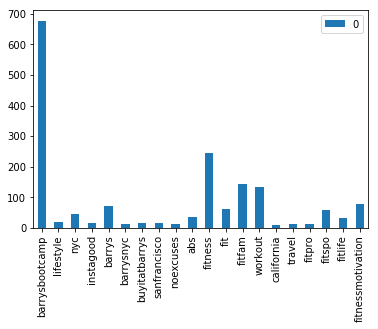

In [48]:
df3.plot(kind='bar')

In [49]:
json_data = open("24hourfitness/24hourfitness.json")
j = json.load(json_data)
json_data.close()

In [50]:
totalTags = []
for i in range(len(j)):
    if 'tags' in j[i].keys():
        try:
            totalTags+=[str(b) for b in j[i]['tags']]
        except:
            pass

In [51]:
wordCount = Counter(totalTags)

In [52]:
df = pandas.DataFrame.from_dict(wordCount, orient='index')
df1 = df[df>10]
df2= df1.dropna()
df3 = df2.head(20)
df3.sort_values([0], ascending=False)

,0
24hourfitness,793.0
fitness,357.0
gym,256.0
fitfam,151.0
bodybuilding,142.0
gains,96.0
lafitness,85.0
gymrat,83.0
physique,43.0
weights,41.0


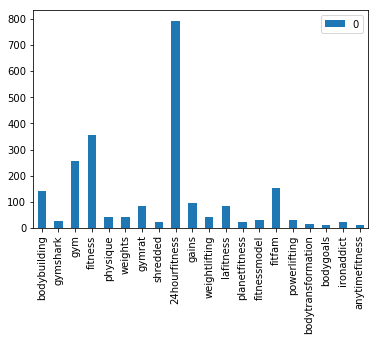

In [53]:
df3.plot(kind='bar')

In [54]:
json_data = open("yoga/yoga.json")
j = json.load(json_data)
json_data.close()

In [55]:
totalTags = []
for i in range(len(j)):
    if 'tags' in j[i].keys():
        try:
            totalTags+=[str(b) for b in j[i]['tags']]
        except:
            pass

In [56]:
wordCount = Counter(totalTags)

In [57]:
df = pandas.DataFrame.from_dict(wordCount, orient='index')
df1 = df[df>10]
df2= df1.dropna()
df3 = df2.head(20)
df3.sort_values([0], ascending=False)

,0
yoga,763.0
fitness,165.0
yogaeverydamnday,142.0
yogachallenge,65.0
gym,54.0
vegan,39.0
fitspo,31.0
bodybuilding,26.0
model,25.0
practice,25.0


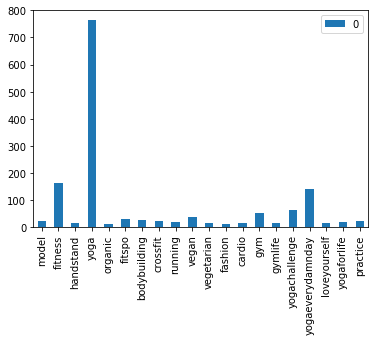

In [58]:
df3.plot(kind='bar')

In [59]:
json_data = open("cycling/cycling.json")
j = json.load(json_data)
json_data.close()

In [60]:
totalTags = []
for i in range(len(j)):
    if 'tags' in j[i].keys():
        try:
            totalTags+=[str(b) for b in j[i]['tags']]
        except:
            pass

In [61]:
wordCount = Counter(totalTags)

In [62]:
df = pandas.DataFrame.from_dict(wordCount, orient='index')
df1 = df[df>10]
df2= df1.dropna()
df3 = df2.head(20)
df3.sort_values([0], ascending=False)

,0
cycling,822.0
Cycling,58.0
Fitness,33.0
YouCanDoIt,29.0
FitFam,28.0
GetStrong,28.0
FitnessAddict,28.0
FitLife,28.0
NoExcuses,27.0
FitnessMotivation,26.0


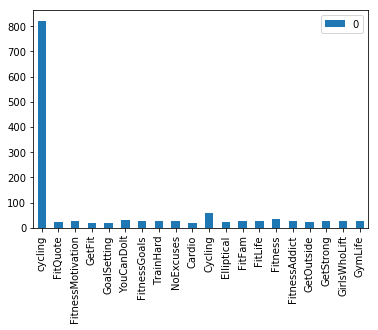

In [63]:
df3.plot(kind='bar')

In [64]:
json_data = open("crossfit/crossfit.json")
j = json.load(json_data)
json_data.close()

In [65]:
totalTags = []
for i in range(len(j)):
    if 'tags' in j[i].keys():
        try:
            totalTags+=[str(b) for b in j[i]['tags']]
        except:
            pass

In [66]:
wordCount = Counter(totalTags)

In [67]:
df = pandas.DataFrame.from_dict(wordCount, orient='index')
df1 = df[df>10]
df2= df1.dropna()
df3 = df2.head(20)
df3.sort_values([0], ascending=False)

,0
crossfit,772.0
fitness,331.0
bodybuilding,108.0
fitnessmotivation,65.0
crossfitter,60.0
crossfitgirls,54.0
CrossFit,38.0
Repost,34.0
personaltrainer,31.0
body,31.0


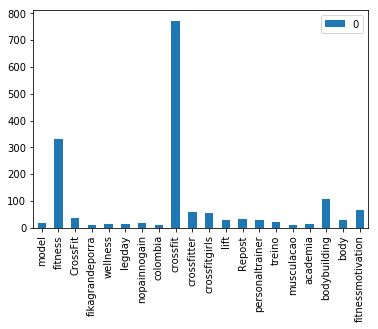

In [68]:
df3.plot(kind='bar')